In [64]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import tops
import matplotlib.pyplot as plt
from tops.config import LazyConfig
import pathlib
from pathlib import Path
from ssd.utils import load_config

In [54]:
def path_object_to_str(obj):
    if isinstance(obj, pathlib.Path):
        return str(obj.decode()) 

In [65]:
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path

path = "../configs/ssd300.py"

config_path = Path(path)
run_name = "_".join(config_path.parts[1:-1]) + "_" + config_path.stem
cfg = LazyConfig.load(os.fspath(config_path))
cfg.output_dir = Path(cfg.train._output_dir).joinpath(*config_path.parts[1:-1], config_path.stem)
cfg.run_name = run_name



#cfg = load_config(str)
logs = tops.logger.read_logs(pathlib.Path("../outputs/ssd300"))

Saving SSD outputs to: outputs/


In [14]:
cfg = load_config("../configs/voc_vgg.py")
logs = tops.logger.read_logs(pathlib.Path("../outputs/voc_vgg"))

AttributeError: 'str' object has no attribute 'decode'

In [66]:
# The log is formatted as a list of dictionaries
print(logs[:10])

[{'amp/grad_scale': 32768.0, 'global_step': 0}, {'loss/regression_loss': 2.8956916332244873, 'loss/classification_loss': 9.695500373840332, 'loss/total_loss': 12.591192245483398, 'global_step': 0}, {'stats/learning_rate': 0.000509, 'global_step': 1}, {'stats/learning_rate': 0.000518, 'global_step': 2}, {'stats/learning_rate': 0.000527, 'global_step': 3}, {'stats/learning_rate': 0.000536, 'global_step': 4}, {'stats/learning_rate': 0.000545, 'global_step': 5}, {'stats/learning_rate': 0.000554, 'global_step': 6}, {'stats/learning_rate': 0.000563, 'global_step': 7}, {'stats/learning_rate': 0.0005719999999999999, 'global_step': 8}]


In [67]:
# We are saving logs to disk every 10th iteration, thus we need to filter out all entries without a loss
loss_entries = [entry for entry in logs if "loss/regression_loss" in entry]

Text(0.5, 0, 'Global step (number of batches trained on)')

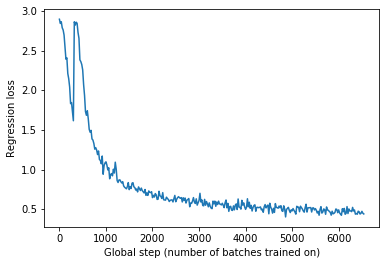

In [68]:
plt.plot([entry["global_step"] for entry in loss_entries], [entry["loss/regression_loss"] for entry in loss_entries])
plt.ylabel("Regression loss")
plt.xlabel("Global step (number of batches trained on)")